0.772+/-0.023 0.310+/-0.019


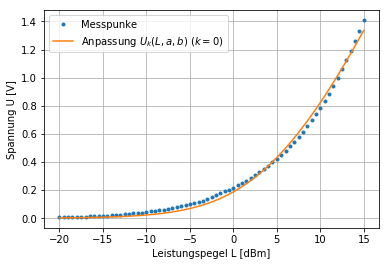

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import lambertw
import uncertainties as unc
import uncertainties.unumpy as unp

def ULambert0(L,a,b):
    return np.real(a*lambertw(b*10**(L/10),0))

def fexp(U,a,b):
    return a*np.exp(b*U)

#load data
P, U = np.loadtxt("messung/Kennlinie.txt",unpack=True,skiprows=1) #p in dBM, U in in V

#plot data
plt.plot(P,U,ls=" ", marker=".",label="Messpunke")

#fit data
#popt, pcov = curve_fit(fexp,P,U)
poptU0, pcovU0 = curve_fit(ULambert0,P,U)
A=unc.ufloat(poptU0[0],np.absolute(pcovU0[0][0])**0.5)
B=unc.ufloat(poptU0[1],np.absolute(pcovU0[1][1])**0.5)
print(A,B)
#plot fit
xfit=np.linspace(-20,15,100)
#plt.plot(xfit,fexp(xfit,popt[0],popt[1]),label="Anpassung Exp")
plt.plot(xfit,ULambert0(xfit,poptU0[0],poptU0[1]),label="Anpassung $U_k(L,a,b)$ $(k=0)$")

plt.xlabel("Leistungspegel L [dBm]")
plt.ylabel("Spannung U [V]")
plt.legend()
plt.grid()
plt.savefig("img/Kennlinie.pdf")
plt.show()